#IMPORT LIBRARIES

In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [290]:
df_train = pd.read_csv('https://raw.githubusercontent.com/BryMat24/IE0005/main/train.csv')
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [291]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [292]:
n_rows, n_cols = df_train.shape
print(f"The training dataset has {n_rows:,} rows and {n_cols:,} columns")

The training dataset has 45,593 rows and 20 columns


#DATA CLEANING


In [293]:
df_train.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                 object
dtype: object

###Updating Column Name - convert all into snake case form

In [294]:
# Create a dictionary to map the original column names to snake_case names
column_mapping = {col: col.lower().replace(' ', '_') for col in df_train.columns}

# Rename the columns using the dictionary
df_train = df_train.rename(columns=column_mapping)

# Rename the specific column
df_train = df_train.rename(columns={'time_taken(min)': 'time_taken', 'weatherconditions': 'weather_conditions'})

df_train.head()

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


###Dropping columns that are not used to build models

In [295]:
# Drop columns id and delivery_person_id
def drop_columns(df):
    df.drop(['id','delivery_person_id'],axis=1,inplace=True)

print("Before No. of columns: ",df_train.shape[1])
drop_columns(df_train)
print("After No. of columns: ",df_train.shape[1])

Before No. of columns:  20
After No. of columns:  18


###Clean time taken

In [296]:
# Extracting only the numeric part of the time_taken and convert its data type of int to int64
print("Data type of time_taken before conversion: ", df_train['time_taken'].dtype)
df_train['time_taken'] = df_train['time_taken'].apply(lambda x: int(x.split(' ')[1].strip()))
print("Data type of time_taken after conversion: ", df_train['time_taken'].dtype)

Data type of time_taken before conversion:  object
Data type of time_taken after conversion:  int64


In [297]:
# drop NaN values if any -> there are none
df_train['time_taken'].dropna()
df_train.count()

delivery_person_age            45593
delivery_person_ratings        45593
restaurant_latitude            45593
restaurant_longitude           45593
delivery_location_latitude     45593
delivery_location_longitude    45593
order_date                     45593
time_orderd                    45593
time_order_picked              45593
weather_conditions             45593
road_traffic_density           45593
vehicle_condition              45593
type_of_order                  45593
type_of_vehicle                45593
multiple_deliveries            45593
festival                       45593
city                           45593
time_taken                     45593
dtype: int64

In [298]:
df_train.dtypes

delivery_person_age             object
delivery_person_ratings         object
restaurant_latitude            float64
restaurant_longitude           float64
delivery_location_latitude     float64
delivery_location_longitude    float64
order_date                      object
time_orderd                     object
time_order_picked               object
weather_conditions              object
road_traffic_density            object
vehicle_condition                int64
type_of_order                   object
type_of_vehicle                 object
multiple_deliveries             object
festival                        object
city                            object
time_taken                       int64
dtype: object

###Clean weather condition



In [321]:
# extracting essential data in weather condition - removing the 'conditions' from each value
df_train['weather_conditions'] = df_train['weather_conditions'].str.replace('conditions ', '')
df_train["weather_conditions"].unique()

# we notice that there are missing values 'NaN', we will handle it later via imputation

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', 'NaN'],
      dtype=object)

###Clean Delivery Person Ratings

In [300]:
# removing rows where delivery_person_ratings with NaN and convert its datatype into float64
df_train = df_train.drop(df_train[df_train['delivery_person_ratings']=='NaN '].index)
df_train['delivery_person_ratings'] = df_train['delivery_person_ratings'].astype('float64')
df_train['delivery_person_ratings'].unique()

array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , 3.5, 3.8,
       3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4, 2.8,
       2.9, 3. ])

Number of entries with a rating of 6: 53


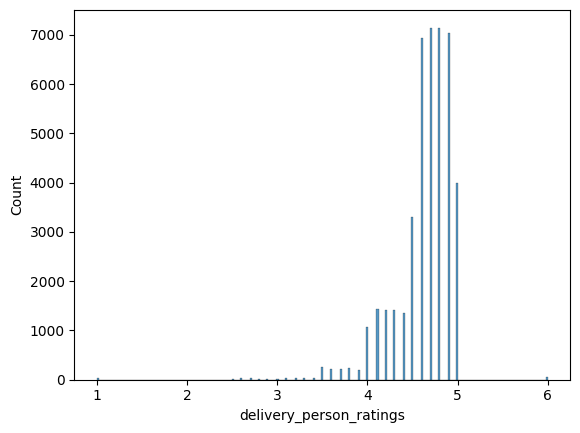

In [301]:
# we assume that 6 is an error, so we will replace it with 5
sb.histplot(data = df_train['delivery_person_ratings'])
count_6_ratings = len(df_train[df_train['delivery_person_ratings'] == 6])
print("Number of entries with a rating of 6:", count_6_ratings)

In [302]:
# Assuming 'delivery_person_ratings' is the column with the ratings
df_train['delivery_person_ratings'] = df_train['delivery_person_ratings'].replace(6, 5)

###Clean Delivery Person Age

In [ ]:
df_train['delivery_person_age'] = df_train['delivery_person_age'].astype('int64')
df_train['delivery_person_age'].unique()

array([37, 34, 23, 38, 32, 22, 33, 35, 36, 21, 24, 29, 25, 31, 27, 26, 20,
       28, 39, 30, 15, 50])

###Handling NaN values in weather_condition via mode imputation

In [330]:
print(df_train["weather_conditions"].value_counts())
df_train['weather_conditions'] = df_train['weather_conditions'].replace('NaN', 'Fog')
print(df_train['weather_conditions'].unique())

Fog           7435
Stormy        7366
Cloudy        7277
Sandstorms    7238
Windy         7211
Sunny         7067
NaN             91
Name: weather_conditions, dtype: int64
['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy']


###Handling NaN values in multiple_deliveries via Mode imputation



In [303]:
print("BEFORE: ", df_train["multiple_deliveries"].unique())
df_train['multiple_deliveries'] = df_train['multiple_deliveries'].replace('NaN ', '1')
print("AFTER: ", df_train["multiple_deliveries"].unique())

BEFORE:  ['0' '1' '3' 'NaN ' '2']
AFTER:  ['0' '1' '3' '2']


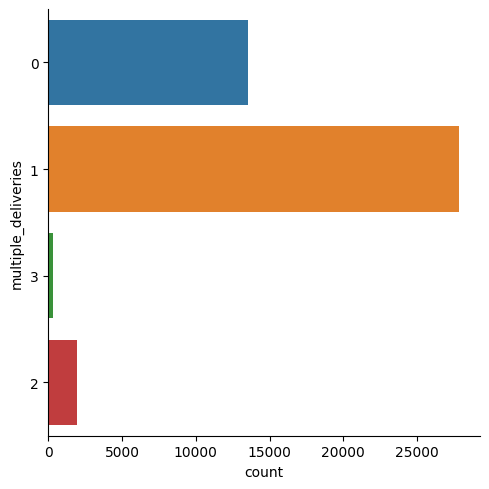

In [304]:
sb.catplot(y = "multiple_deliveries", data = df_train, kind = "count")

###Handling NaN values in road_traffic_density via mode imputation

In [305]:
print("BEFORE: ", df_train["road_traffic_density"].unique())
df_train['road_traffic_density'] = df_train['road_traffic_density'].replace('NaN ', 'Low ')
print("AFTER: ", df_train["road_traffic_density"].unique())

BEFORE:  ['High ' 'Jam ' 'Low ' 'Medium ' 'NaN ']
AFTER:  ['High ' 'Jam ' 'Low ' 'Medium ']


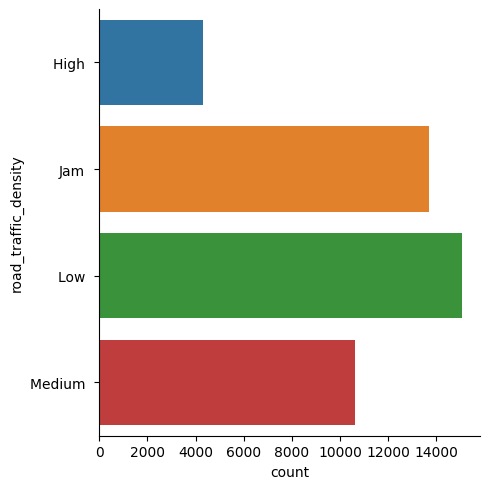

In [306]:
sb.catplot(y = "road_traffic_density", data = df_train, kind = "count")

###Handling NaN values in City column via mode imputation

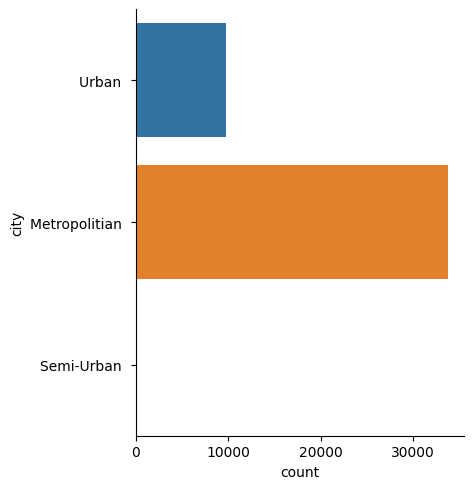

In [312]:
df_train["city"].unique()
df_train['city'] = df_train['city'].replace('NaN ', "Metropolitian ")
sb.catplot(y = "city", data = df_train, kind = "count")

###Handling NaN values in Festival column via mode imputation

In [318]:
print(df_train["festival"].value_counts())

No      42831
Yes       854
Name: festival, dtype: int64


In [316]:
print(df_train["festival"].unique())
df_train['festival'] = df_train['festival'].replace('NaN ', "No ")

['No ' 'Yes ' 'NaN ']


###Stripping spaces from columns

In [ ]:
# strip space from type_of_vehicle
print("Before: ", df_train["type_of_vehicle"].unique())
df_train["type_of_vehicle"] = df_train["type_of_vehicle"].str.replace(" ", "")
df_train["type_of_vehicle"] = df_train["type_of_vehicle"].str.capitalize()
print("After: ", df_train["type_of_vehicle"].unique())

Before:  ['motorcycle ' 'scooter ' 'electric_scooter ' 'bicycle ']
After:  ['Motorcycle' 'Scooter' 'Electric_scooter' 'Bicycle']


In [ ]:
# strip space from type_or_order
print("Before: ", df_train["type_of_order"].unique())
df_train["type_of_order"] = df_train["type_of_order"].str.replace(" ", "")
print("After: ", df_train["type_of_order"].unique())

Before:  ['Snack' 'Drinks' 'Buffet' 'Meal']
After:  ['Snack' 'Drinks' 'Buffet' 'Meal']


In [308]:
# strip space from road_traffic_density and also replacing the NaN values with the mode
print(df_train["road_traffic_density"].unique())
df_train["road_traffic_density"] = df_train["road_traffic_density"].str.replace(" ", "")
print(df_train["road_traffic_density"].unique())

['High' 'Jam' 'Low' 'Medium']
['High' 'Jam' 'Low' 'Medium']


In [313]:
# strip space from the city column
print(df_train["city"].unique())
df_train["city"] = df_train["city"].str.replace(" ", "")
print(df_train["city"].unique())

['Urban ' 'Metropolitian ' 'Semi-Urban ']
['Urban' 'Metropolitian' 'Semi-Urban']


In [319]:
# strip space from festival column
print(df_train["festival"].unique())
df_train["festival"] = df_train["festival"].str.replace(" ", "")
print(df_train["festival"].unique())

['No ' 'Yes ']
['No' 'Yes']


#Exporting Cleaned Data for EDA and Machine Learning Process

In [332]:
df_train.head()

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30


In [333]:
df_train.to_csv('train_cleaned.csv', index=False)